In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

## Task 2 : Disease Prediction

### Data Description
### 133 columns have been provided with 132 of them being symptoms experienced by patients and last column in prognosis for the same patient.
### Examples to symptoms are itching ,skin_rash	, nodal_skin_eruptions, continuous_sneezing	shivering, chills, joint_pain, stomach_pain	, acidity,ulcers_on_tongue,
### scurring,skin_peeling , silver_like_dusting	, small_dents_in_nails	,inflammatory_nails	,blister, red_sore_around_nose,	yellow_crust_ooze


In [2]:
df= pd.read_csv('D:\\DeepLearning\\CodeAlpha_Project_Name\DiseasePredictionTask\\Dataset\\Training.csv')
df_test=pd.read_csv('D:\\DeepLearning\\CodeAlpha_Project_Name\\DiseasePredictionTask\\Dataset\\Testing.csv')

In [3]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


In [5]:
df.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Unnamed: 133
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,0.0
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,NaN
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN


In [6]:
df.shape

(4920, 134)

In [7]:
df_test.shape

(42, 133)

In [8]:
print(df.columns)

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis',
       'Unnamed: 133'],
      dtype='object', length=134)


In [9]:
df.isnull().sum()

itching                    0
skin_rash                  0
nodal_skin_eruptions       0
continuous_sneezing        0
shivering                  0
                        ... 
blister                    0
red_sore_around_nose       0
yellow_crust_ooze          0
prognosis                  0
Unnamed: 133            4920
Length: 134, dtype: int64

### Remove unnammed column as it contain NAn values or 0

In [10]:
null_columns = df.columns[df.isnull().any()] #unnamed  will be dropped becauase it contains many null values
print(null_columns)

Index(['Unnamed: 133'], dtype='object')


In [11]:
# drop 'Unnamed: 133'
df.drop('Unnamed: 133', axis=1, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


### No Null values found

In [13]:
df.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

### Display the unique values in the 'prognosis' column of your DataFrame and prints the total number of unique values.

In [14]:
import pandas as pd
# Assuming your DataFrame is named df
sorted(df['prognosis'].unique())
print(sorted(df['prognosis'].unique()))
print(len(sorted(df['prognosis'].unique())))

['(vertigo) Paroymsal  Positional Vertigo', 'AIDS', 'Acne', 'Alcoholic hepatitis', 'Allergy', 'Arthritis', 'Bronchial Asthma', 'Cervical spondylosis', 'Chicken pox', 'Chronic cholestasis', 'Common Cold', 'Dengue', 'Diabetes ', 'Dimorphic hemmorhoids(piles)', 'Drug Reaction', 'Fungal infection', 'GERD', 'Gastroenteritis', 'Heart attack', 'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E', 'Hypertension ', 'Hyperthyroidism', 'Hypoglycemia', 'Hypothyroidism', 'Impetigo', 'Jaundice', 'Malaria', 'Migraine', 'Osteoarthristis', 'Paralysis (brain hemorrhage)', 'Peptic ulcer diseae', 'Pneumonia', 'Psoriasis', 'Tuberculosis', 'Typhoid', 'Urinary tract infection', 'Varicose veins', 'hepatitis A']
41


### This part of the code uses the boolean Series to select only the rows where duplicates are found in the original DataFrame df_test.

### duplicated_rows: This variable now contains the subset of df_test with only the duplicated rows.

In [15]:
duplicated_rows = df_test[df_test.duplicated(subset=None, keep=False)]

# Now you can use or print the duplicated_rows DataFrame to see the duplicated rows
print(duplicated_rows)

Empty DataFrame
Columns: [itching, skin_rash, nodal_skin_eruptions, continuous_sneezing, shivering, chills, joint_pain, stomach_pain, acidity, ulcers_on_tongue, muscle_wasting, vomiting, burning_micturition, spotting_ urination, fatigue, weight_gain, anxiety, cold_hands_and_feets, mood_swings, weight_loss, restlessness, lethargy, patches_in_throat, irregular_sugar_level, cough, high_fever, sunken_eyes, breathlessness, sweating, dehydration, indigestion, headache, yellowish_skin, dark_urine, nausea, loss_of_appetite, pain_behind_the_eyes, back_pain, constipation, abdominal_pain, diarrhoea, mild_fever, yellow_urine, yellowing_of_eyes, acute_liver_failure, fluid_overload, swelling_of_stomach, swelled_lymph_nodes, malaise, blurred_and_distorted_vision, phlegm, throat_irritation, redness_of_eyes, sinus_pressure, runny_nose, congestion, chest_pain, weakness_in_limbs, fast_heart_rate, pain_during_bowel_movements, pain_in_anal_region, bloody_stool, irritation_in_anus, neck_pain, dizziness, cra

In [16]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 43.8+ KB


### display the unique values in the 'prognosis' column of your DataFrame along with the count of each unique value

In [17]:
from collections import Counter
count = Counter(df['prognosis'])
count.items()

dict_items([('Fungal infection', 120), ('Allergy', 120), ('GERD', 120), ('Chronic cholestasis', 120), ('Drug Reaction', 120), ('Peptic ulcer diseae', 120), ('AIDS', 120), ('Diabetes ', 120), ('Gastroenteritis', 120), ('Bronchial Asthma', 120), ('Hypertension ', 120), ('Migraine', 120), ('Cervical spondylosis', 120), ('Paralysis (brain hemorrhage)', 120), ('Jaundice', 120), ('Malaria', 120), ('Chicken pox', 120), ('Dengue', 120), ('Typhoid', 120), ('hepatitis A', 120), ('Hepatitis B', 120), ('Hepatitis C', 120), ('Hepatitis D', 120), ('Hepatitis E', 120), ('Alcoholic hepatitis', 120), ('Tuberculosis', 120), ('Common Cold', 120), ('Pneumonia', 120), ('Dimorphic hemmorhoids(piles)', 120), ('Heart attack', 120), ('Varicose veins', 120), ('Hypothyroidism', 120), ('Hyperthyroidism', 120), ('Hypoglycemia', 120), ('Osteoarthristis', 120), ('Arthritis', 120), ('(vertigo) Paroymsal  Positional Vertigo', 120), ('Acne', 120), ('Urinary tract infection', 120), ('Psoriasis', 120), ('Impetigo', 120)]

### data is balanced as every disease occurrences are equal

C:\Users\Shaima\AppData\Local\Temp\ipykernel_9992\2806436548.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='prognosis', palette='PuBu')


C:\Users\Shaima\AppData\Local\Temp\ipykernel_9992\2806436548.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


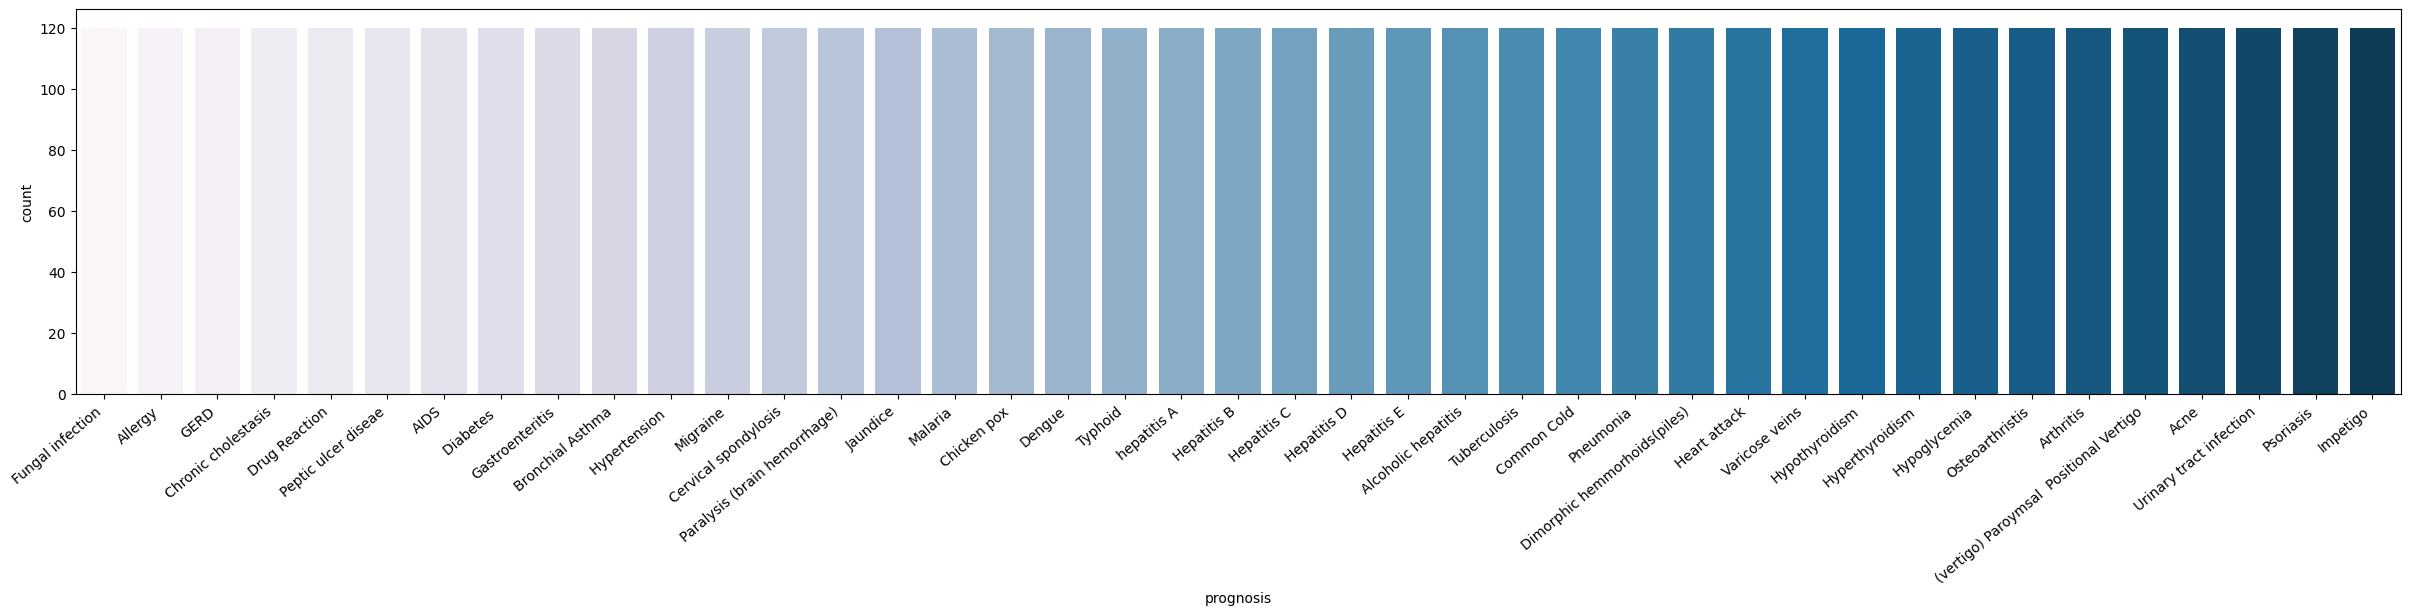

In [18]:
# count of each target class label
plt.figure(figsize=(30, 5))
ax = sns.countplot(data=df, x='prognosis', palette='PuBu')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [19]:
# list of all 133 symptoms
columns = list(df.columns)
print(columns)
len(columns)

['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs', 'fast_heart_rate', 'pain_during_bow

133

In [20]:
X = df.iloc[:,:-1]# get all the features (symptoms)
Y = df['prognosis'] #last column is the output we want to predict

In [21]:
print(X)

      itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0           1          1                     1                    0   
1           0          1                     1                    0   
2           1          0                     1                    0   
3           1          1                     0                    0   
4           1          1                     1                    0   
...       ...        ...                   ...                  ...   
4915        0          0                     0                    0   
4916        0          1                     0                    0   
4917        0          0                     0                    0   
4918        0          1                     0                    0   
4919        0          1                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0             0       0           0             0        0         

In [22]:
print(Y)

0                              Fungal infection
1                              Fungal infection
2                              Fungal infection
3                              Fungal infection
4                              Fungal infection
                         ...                   
4915    (vertigo) Paroymsal  Positional Vertigo
4916                                       Acne
4917                    Urinary tract infection
4918                                  Psoriasis
4919                                   Impetigo
Name: prognosis, Length: 4920, dtype: object


### The pd.get_dummies() function in pandas is used to convert categorical variable(s) into dummy/indicator variables. When applied to the target variable Y, it essentially converts each unique category in Y into a separate binary column

In [23]:
# perform hot encoding to the output as it is cateogorical , and not ordinal
y_encoded = pd.get_dummies(Y)


In [24]:
print(y_encoded)

      (vertigo) Paroymsal  Positional Vertigo   AIDS   Acne  \
0                                       False  False  False   
1                                       False  False  False   
2                                       False  False  False   
3                                       False  False  False   
4                                       False  False  False   
...                                       ...    ...    ...   
4915                                     True  False  False   
4916                                    False  False   True   
4917                                    False  False  False   
4918                                    False  False  False   
4919                                    False  False  False   

      Alcoholic hepatitis  Allergy  Arthritis  Bronchial Asthma  \
0                   False    False      False             False   
1                   False    False      False             False   
2                   False    False      Fa

In [42]:
y_encoded.shape

(3936,)

### Split the data into 70% training and 30% testing

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, shuffle=True, random_state=42)
# x_train.shape, y_train.shape

### Decision Tree Classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier

classifierDT = DecisionTreeClassifier(splitter='best', criterion='entropy', min_samples_leaf=2)
classifierDT.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2)

In [27]:
from sklearn.metrics import classification_report
y_pred0 = classifierDT.predict(x_test)

print(classification_report(y_test, y_pred0))
# using accuracy performance metric
from sklearn.metrics import accuracy_score
print("Train Accuracy: ", accuracy_score(y_train, classifierDT.predict(x_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred0))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00        41
           3       1.00      1.00      1.00        36
           4       1.00      1.00      1.00        35
           5       1.00      1.00      1.00        36
           6       1.00      1.00      1.00        44
           7       1.00      1.00      1.00        32
           8       1.00      1.00      1.00        35
           9       1.00      1.00      1.00        30
          10       1.00      1.00      1.00        31
          11       1.00      1.00      1.00        40
          12       1.00      1.00      1.00        33
          13       0.90      1.00      0.95        45
          14       1.00      1.00      1.00        35
          15       1.00      1.00      1.00        28
          16       1.00      1.00      1.00        41
          17       1.00    

### Random forest Model

In [28]:
#build the model
rfc_Model = RandomForestClassifier(random_state=0,criterion='entropy', min_samples_leaf=5)
rfc_Model.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', min_samples_leaf=5, random_state=0)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred1 = rfc_Model.predict(x_test)

print(classification_report(y_test, y_pred1))
print("Train Accuracy: ", accuracy_score(y_train, rfc_Model.predict(x_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred1))

C:\Users\Shaima\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      0.95      0.97        39
           2       1.00      0.95      0.97        41
           3       1.00      1.00      1.00        36
           4       1.00      1.00      1.00        35
           5       1.00      1.00      1.00        36
           6       1.00      0.95      0.98        44
           7       1.00      1.00      1.00        32
           8       1.00      1.00      1.00        35
           9       1.00      0.93      0.97        30
          10       1.00      1.00      1.00        31
          11       1.00      1.00      1.00        40
          12       1.00      1.00      1.00        33
          13       1.00      1.00      1.00        45
          14       1.00      1.00      1.00        35
          15       1.00      1.00      1.00        28
          16       1.00      0.95      0.97        41
          17       1.00    

### Multilayer perceptron Model

In [30]:
classifierMLP = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
classifierMLP.fit(x_train, y_train)

MLPClassifier(max_iter=1000, random_state=42)

In [31]:
# Evaluate the model
y_pred2 = classifierMLP.predict(x_test)
accuracy = accuracy_score(y_test, y_pred2)
print(accuracy)

1.0


In [32]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred2))

# using accuracy performance metric
from sklearn.metrics import accuracy_score
print("Train Accuracy: ", accuracy_score(y_train, classifierMLP.predict(x_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00        41
           3       1.00      1.00      1.00        36
           4       1.00      1.00      1.00        35
           5       1.00      1.00      1.00        36
           6       1.00      1.00      1.00        44
           7       1.00      1.00      1.00        32
           8       1.00      1.00      1.00        35
           9       1.00      1.00      1.00        30
          10       1.00      1.00      1.00        31
          11       1.00      1.00      1.00        40
          12       1.00      1.00      1.00        33
          13       1.00      1.00      1.00        45
          14       1.00      1.00      1.00        35
          15       1.00      1.00      1.00        28
          16       1.00      1.00      1.00        41
          17       1.00    

# Apply linear classifiers


### Support Vector Machine Classifier

In [107]:
from sklearn.preprocessing import StandardScaler
# Standardize the features (important for SVM)
# Assuming y_train might be a 2D array, flatten it to 1D
#This method is used to flatten the array into a one-dimensional array. If the array is already one-dimensional, it returns a flattened copy.
y_encoded = y_train.values.ravel() 

scaler = StandardScaler()

X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Train the SVM model on the training data
svm_classifier.fit(X_train, y_encoded)

# Make predictions on the testing data
y_pred = svm_classifier.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 1.00
Classification Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        18
                                   AIDS       1.00      1.00      1.00        30
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        25
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      1.00      1.00        33
                   Cervical spondylosis       1.00      1.00      1.00        23
                            Chicken pox       1.00      1.00      1.00        21
                    Chronic cholestasis       1.00      1.00      1.00        15
                            Common Cold       1.00      1.00      1.0

### Logistic Regression

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


# Create a Logistic Regression model with regularization
model = LogisticRegression(C=0.5)  # You can experiment with different C values

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


Test Accuracy: 1.0


### Deep Neural Network

### Steps
### Label Encoding:

The LabelEncoder is used to convert class labels (y_train) from strings to integers. This step is crucial for neural network training since the network requires numerical inputs.

### One-Hot Encoding:

The integer-encoded labels (y_train_encoded) are then converted to one-hot encoding using to_categorical. One-hot encoding is necessary for categorical (multi-class) classification problems.
one-hot encoding is a standard practice in multi-class classification tasks to ensure compatibility with the requirements of machine learning models, loss functions, and output layer activations. It helps avoid potential misinterpretations of ordinal relationships and ensures that the model can effectively learn and make predictions in a categorical context.

### Neural Network Model:
The neural network model is constructed using the Sequential API from Keras. It consists of three layers: an input layer with 32 neurons and ReLU activation, a hidden layer with 16 neurons and ReLU activation, and an output layer with a softmax activation function (suitable for multi-class classification).

### Compilation:
The model is compiled with the Adam optimizer, categorical crossentropy loss (appropriate for multi-class classification), and accuracy as the evaluation metric.

### Early Stopping:
The EarlyStopping callback is set up to monitor the validation accuracy during training. If the accuracy does not improve for a certain number of epochs (defined by the patience parameter), training will be stopped early to prevent overfitting.

### Training:
The model is trained using the fit method, where x_train is the input data, y_train_one_hot is the one-hot encoded labels, batch_size is the number of samples per gradient update, and epochs is the number of training epoch

In [97]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
import pickle

# Assuming y_train contains your class labels as strings
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
num_classes = len(np.unique(y_train_encoded))

In [98]:

# Assuming y_train_encoded contains your class labels as integers
from keras.utils import to_categorical

# Convert integer labels to one-hot encoding
y_train_one_hot = to_categorical(y_train_encoded, num_classes=num_classes)

# Build and compile the model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(patience=2, monitor='val_accuracy')

# Train the model
model.fit(x_train, y_train_one_hot, batch_size=40, epochs=10, validation_split=0.25, callbacks=[early_stopping])


Epoch 1/10
74/74 [==============================] - 1s 4ms/step - loss: 3.5490 - accuracy: 0.1565 - val_loss: 3.3074 - val_accuracy: 0.2358
Epoch 2/10
74/74 [==============================] - 0s 2ms/step - loss: 2.8432 - accuracy: 0.3709 - val_loss: 2.2829 - val_accuracy: 0.6230
Epoch 3/10
74/74 [==============================] - 0s 2ms/step - loss: 1.6308 - accuracy: 0.8069 - val_loss: 1.0406 - val_accuracy: 0.9167
Epoch 4/10
74/74 [==============================] - 0s 2ms/step - loss: 0.6434 - accuracy: 0.9621 - val_loss: 0.3486 - val_accuracy: 0.9980
Epoch 5/10
74/74 [==============================] - 0s 2ms/step - loss: 0.2201 - accuracy: 1.0000 - val_loss: 0.1328 - val_accuracy: 1.0000
Epoch 6/10
74/74 [==============================] - 0s 2ms/step - loss: 0.0945 - accuracy: 1.0000 - val_loss: 0.0682 - val_accuracy: 1.0000
Epoch 7/10
74/74 [==============================] - 0s 2ms/step - loss: 0.0520 - accuracy: 1.0000 - val_loss: 0.0414 - val_accuracy: 1.0000


In [99]:
model.summary()


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 32)                4256      
                                                                 
 dense_37 (Dense)            (None, 16)                528       
                                                                 
 dense_38 (Dense)            (None, 41)                697       
                                                                 
Total params: 5481 (21.41 KB)
Trainable params: 5481 (21.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [82]:
y_test_encoded = pd.get_dummies(y_test)
evaluation = model.evaluate(x_test, y_test_encoded, verbose=2)

# Display the evaluation metrics (loss and accuracy)
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

31/31 - 0s - loss: 0.0385 - accuracy: 1.0000 - 146ms/epoch - 5ms/step
Test Loss: 0.03851817175745964
Test Accuracy: 1.0


In [84]:
predictions = model.predict(x_test)
print(predictions)

31/31 [==============================] - 0s 1ms/step
[[5.1923789e-04 1.7658551e-04 9.3048441e-01 ... 7.7442178e-03
  7.5181655e-05 9.1294987e-06]
 [4.9950999e-05 4.4497014e-05 9.8447257e-01 ... 2.4287940e-03
  8.2315028e-06 7.1508259e-07]
 [5.7838884e-06 2.6380778e-06 2.4756239e-09 ... 2.0574860e-06
  5.3621743e-08 6.8425678e-08]
 ...
 [8.9255991e-05 5.1734945e-09 2.7850496e-07 ... 9.8496066e-08
  1.3675476e-07 1.8160311e-07]
 [4.7586212e-04 3.1165048e-04 9.3169200e-01 ... 7.3449840e-03
  1.3985258e-04 9.2854971e-06]
 [5.7079986e-04 2.0100662e-05 1.4499851e-03 ... 1.9643777e-03
  1.9312346e-04 3.9114014e-04]]
